In [1]:
from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

In [2]:
# Load and preprocess data
loading_data = DataLoader()
loading_data.load_dataset()
loading_data.preprocess_data()

In [3]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = loading_data.get_data_split()
# Oversample the train data
X_train, y_train = loading_data.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [4]:
#Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


F1 Score 0.5322285353535354
Accuracy 0.9432485322896281


In [5]:
#Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,43.0,0,0,91.13,33.9


In [6]:
# Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values

(1, 21)


[array([[ 4.51349302e-03,  8.98115976e-03, -5.02695623e-07,
         -1.23315979e-03, -3.85829238e-03, -1.67274764e-04,
         -3.15095530e-05,  4.64009133e-03,  9.12878782e-03,
         -3.87234076e-03,  6.20518898e-03,  8.76412909e-03,
         -1.11627457e-04,  1.53558845e-02,  1.58376095e-02,
          4.35997019e-03,  2.30992192e-01,  1.27563436e-02,
          9.15370541e-03,  9.66171032e-02,  8.20924743e-02]]),
 array([[-4.51349302e-03, -8.98115976e-03,  5.02695623e-07,
          1.23315979e-03,  3.85829238e-03,  1.67274764e-04,
          3.15095530e-05, -4.64009133e-03, -9.12878782e-03,
          3.87234076e-03, -6.20518898e-03, -8.76412909e-03,
          1.11627457e-04, -1.53558845e-02, -1.58376095e-02,
         -4.35997019e-03, -2.30992192e-01, -1.27563436e-02,
         -9.15370541e-03, -9.66171032e-02, -8.20924743e-02]])]

In [7]:
#Visualize local predictions
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # f

The RF predicted: 0


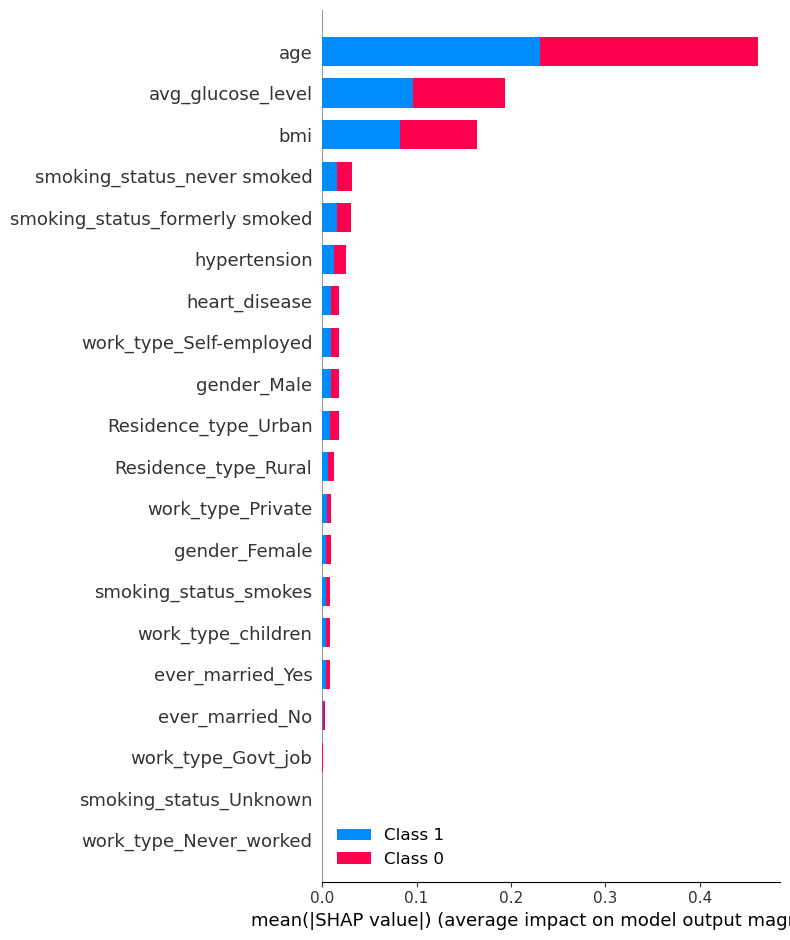

In [8]:
#  Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)